<a href="https://colab.research.google.com/github/custom-hyper/Research/blob/main/watchlist_report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Install Environment & Dependencies

In [2]:
#@title Install Libraries { display-mode: "code" }
!pip install plotly
!pip install pytrends
!pip install pycoingecko
!pip install pandas
!pip install tweepy
!pip install requests
!pip install json


  Created wheel for pytrends: filename=pytrends-4.8.0-py3-none-any.whl size=16126 sha256=29faa487824d870b3d10daf746fc92f6d629d7b9573e50edca71aa9f1729e64e
  Stored in directory: /root/.cache/pip/wheels/07/6f/5c/8174f98dec1bfbc7d5da4092854afcbcff4b26c3d9b66b5183
Successfully built pytrends
ERROR: Could not find a version that satisfies the requirement json (from versions: none)
ERROR: No matching distribution found for json


#Generate Charts

# Token list

In [73]:
#@title Available Currencies  Report { display-mode: "code" }
import requests
import datetime
import time
import json
from google.colab import data_table
import plotly.graph_objects as go
import pandas as pd
import matplotlib.pyplot as plt
from pandas.io.json import json_normalize

#General Information table

def currency_stats(url):
    """
    Generates a list of the currencies on CoinGecko
    Args: url of the CoinGecko website

    """
    frames = []
    response = requests.get(url)
    data = response.json()

    df = pd.DataFrame (data)

    print('Stats: ')
    print(df.info(verbose=True))
    print(df.isnull().sum())
    print(data)

    print(df.describe())

url = "https://api.coingecko.com/api/v3/simple/supported_vs_currencies"

currency_stats(url)



Stats: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       61 non-null     object
dtypes: object(1)
memory usage: 616.0+ bytes
None
0    0
dtype: int64
['btc', 'eth', 'ltc', 'bch', 'bnb', 'eos', 'xrp', 'xlm', 'link', 'dot', 'yfi', 'usd', 'aed', 'ars', 'aud', 'bdt', 'bhd', 'bmd', 'brl', 'cad', 'chf', 'clp', 'cny', 'czk', 'dkk', 'eur', 'gbp', 'hkd', 'huf', 'idr', 'ils', 'inr', 'jpy', 'krw', 'kwd', 'lkr', 'mmk', 'mxn', 'myr', 'ngn', 'nok', 'nzd', 'php', 'pkr', 'pln', 'rub', 'sar', 'sek', 'sgd', 'thb', 'try', 'twd', 'uah', 'vef', 'vnd', 'zar', 'xdr', 'xag', 'xau', 'bits', 'sats']
          0
count    61
unique   61
top     btc
freq      1


In [70]:
#@title Available Currencies  Report { display-mode: "code" }
import requests
import datetime
import time
import json
from google.colab import data_table
import plotly.graph_objects as go
import pandas as pd
import matplotlib.pyplot as plt
from pandas.io.json import json_normalize

#General Information table

def coins_stats(url):
    """
    Generates a list of the currencies on CoinGecko
    Args: url of the CoinGecko website

    """
    frames = []
    response = requests.get(url)
    data = response.json()

    
    df = pd.DataFrame (data)

    print('Stats: ')
    print(df.info(verbose=True))
    print(df.isnull().sum())
    print(df.describe())
   
url = "https://api.coingecko.com/api/v3/coins/list"

coins_stats(url)

Stats: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13337 entries, 0 to 13336
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      13337 non-null  object
 1   symbol  13337 non-null  object
 2   name    13337 non-null  object
dtypes: object(3)
memory usage: 312.7+ KB
None
id        0
symbol    0
name      0
dtype: int64
            id symbol    name
count    13337  13337   13337
unique   13337  11113   13337
top     01coin   gold  01coin
freq         1     10       1


In [58]:
#@title  Generate Coins Reports { display-mode: "code" }

import requests
import datetime
import time
import json
from google.colab import data_table
import plotly.graph_objects as go
import pandas as pd
import matplotlib.pyplot as plt
from pandas.io.json import json_normalize

#General Information table

currency = 'usd'
pages = range(1, 135)
#path = "https://api.coingecko.com/api/v3/coins/markets?vs_currency={}&order=market_cap_desc&per_page=100&page={}&sparkline=false".format(currency, page)

frames = []
for page_num in pages:
    path = "https://api.coingecko.com/api/v3/coins/markets?vs_currency={}&order=market_cap_desc&per_page=100&page={}&sparkline=false".format(currency, page_num)
     #print(path)
    response = requests.get(path)
    data = response.json()
    #print(data)
    full_table = pd.json_normalize(data)
 
    fruits_raw = [full_table] #convert the result to list

    # fruits_df = pd.DataFrame(fruits_raw)
    
    # Add the frame to the list
    frames.append(full_table)
    time.sleep(1.2)
    print(" Sleeping 1.2 second")


# Combine the list of DataFrames into a sIt's been a dish for the W will getGoodingle DataFrame
single = pd.concat(frames)
print(single)
single.to_excel('appended.xlsx')



 Sleeping 1.2 second


KeyboardInterrupt: ignored

 # Basic data

In [ ]:
JSON = cg.get_coins_markets(vs_currency='usd')
full_talbe = pd.json_normalize(JSON)
full_talbe



,id,symbol,name,image,current_price,market_cap,market_cap_rank,fully_diluted_valuation,total_volume,high_24h,...,ath_change_percentage,ath_date,atl,atl_change_percentage,atl_date,roi,last_updated,roi.times,roi.currency,roi.percentage
0,bitcoin,btc,Bitcoin,https://assets.coingecko.com/coins/images/1/la...,41187.000000,782058229868,1,8.648351e+11,2.161189e+10,41556.000000,...,-40.35374,2021-11-10T14:24:11.849Z,67.810000,60633.26775,2013-07-06T00:00:00.000Z,NaN,2022-03-21T20:40:09.246Z,NaN,NaN,NaN
1,ethereum,eth,Ethereum,https://assets.coingecko.com/coins/images/279/...,2919.070000,350473819450,2,NaN,1.383990e+10,2955.980000,...,-40.15761,2021-11-10T14:24:19.604Z,0.432979,674128.70836,2015-10-20T00:00:00.000Z,NaN,2022-03-21T20:40:23.144Z,93.778732,btc,9377.873226
2,tether,usdt,Tether,https://assets.coingecko.com/coins/images/325/...,1.000000,80799077243,3,NaN,4.835613e+10,1.002000,...,-24.40616,2018-07-24T00:00:00.000Z,0.572521,74.69727,2015-03-02T00:00:00.000Z,NaN,2022-03-21T20:36:54.845Z,NaN,NaN,NaN
3,binancecoin,bnb,BNB,https://assets.coingecko.com/coins/images/825/...,397.410000,66801619973,4,6.680162e+10,8.922754e+08,398.970000,...,-42.09496,2021-05-10T07:24:17.097Z,0.039818,997964.05928,2017-10-19T00:00:00.000Z,NaN,2022-03-21T20:39:55.393Z,NaN,NaN,NaN
4,usd-coin,usdc,USD Coin,https://assets.coingecko.com/coins/images/6319...,0.999828,52967465693,5,NaN,2.856813e+09,1.004000,...,-14.79820,2019-05-08T00:40:28.300Z,0.891848,12.03330,2021-05-19T13:14:05.611Z,NaN,2022-03-21T20:39:38.874Z,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,loopring,lrc,Loopring,https://assets.coingecko.com/coins/images/913/...,0.811015,1009747561,96,1.113902e+09,2.325081e+08,0.850085,...,-78.37201,2021-11-10T14:59:53.164Z,0.019639,4029.63055,2019-12-18T13:14:41.553Z,NaN,2022-03-21T20:39:54.720Z,12.516922,usd,1251.692228
96,paxos-standard,usdp,Pax Dollar,https://assets.coingecko.com/coins/images/6013...,1.000000,998295292,97,NaN,5.716393e+07,1.003000,...,-11.35961,2018-10-15T07:09:12.459Z,0.863529,15.75469,2021-05-19T13:14:42.046Z,NaN,2022-03-21T20:40:06.343Z,0.000025,usd,0.002520
97,bitdao,bit,BitDAO,https://assets.coingecko.com/coins/images/1762...,1.120000,993357888,98,1.115921e+10,4.102010e+07,1.140000,...,-63.98458,2021-11-12T04:54:56.433Z,1.043000,7.12239,2022-03-07T20:40:01.501Z,NaN,2022-03-21T20:39:38.500Z,NaN,NaN,NaN
98,xido-finance,xido,Xido Finance,https://assets.coingecko.com/coins/images/1616...,34.550000,979353952,99,NaN,3.897200e+04,36.010000,...,-92.79663,2021-06-09T18:56:55.804Z,5.520000,527.24805,2022-03-02T15:03:30.340Z,NaN,2022-03-21T20:37:26.622Z,NaN,NaN,NaN


In [ ]:

JSON = cg.get_exchanges_id_name_list(id='c2x', vs_currency='usd')
full_talbe = pd.json_normalize(JSON)
full_talbe

,id,name
0,1bch,1BCH
1,aave,Aave
2,aax,AAX
3,aax_futures,AAX Futures
4,abcc,ABCC
...,...,...
580,zgtop,ZG.TOP
581,zilswap,ZilSwap
582,zipmex,Zipmex
583,zkswap,ZKSwap (v1)


In [ ]:

JSON = cg.get_coins_categories(id='c2x', vs_currencies='usd')
full_talbe = pd.json_normalize(JSON)
full_talbe

,id,name,market_cap,market_cap_change_24h,content,top_3_coins,volume_24h,updated_at
0,smart-contract-platform,Smart Contract Platform,6.492696e+11,1.691178,Smart contract platforms are usually blockchai...,[https://assets.coingecko.com/coins/images/279...,2.962846e+10,2022-03-21T20:40:39.703Z
1,binance-smart-chain,BNB Chain Ecosystem,3.199163e+11,0.564851,BNB Chain is an alternative blockchain that is...,[https://assets.coingecko.com/coins/images/325...,6.446825e+10,2022-03-21T20:40:50.815Z
2,polygon-ecosystem,Polygon Ecosystem,2.999876e+11,0.526473,,[https://assets.coingecko.com/coins/images/325...,6.312650e+10,2022-03-21T20:40:24.175Z
3,avalanche-ecosystem,Avalanche Ecosystem,2.953453e+11,0.550941,None,[https://assets.coingecko.com/coins/images/325...,6.231587e+10,2022-03-21T20:40:15.975Z
4,moonriver-ecosystem,Moonriver Ecosystem,2.833685e+11,0.382969,,[https://assets.coingecko.com/coins/images/325...,6.087564e+10,2022-03-21T20:40:34.104Z
...,...,...,...,...,...,...,...,...
67,tourism,Tourism,1.735794e+08,3.556586,None,[https://assets.coingecko.com/coins/images/301...,5.656605e+06,2022-03-21T20:40:45.443Z
68,kardiachain-ecosystem,KardiaChain Ecosystem,1.263385e+08,1.098789,,[https://assets.coingecko.com/coins/images/794...,4.495044e+08,2022-03-21T20:40:44.905Z
69,farming-as-a-service-faas,Farming-as-a-Service (FaaS),4.365137e+07,-0.334369,,[https://assets.coingecko.com/coins/images/215...,1.765482e+05,2022-03-21T20:40:49.316Z
70,aave-tokens,Aave Tokens,0.000000e+00,0.000000,None,[https://assets.coingecko.com/coins/images/116...,1.180681e+05,2022-03-21T20:40:36.325Z


In [ ]:
cg.get_exchanges_list(ids='c2x')

[{'country': 'Cayman Islands',
  'description': '',
  'has_trading_incentive': False,
  'id': 'binance',
  'image': 'https://assets.coingecko.com/markets/images/52/small/binance.jpg?1519353250',
  'name': 'Binance',
  'trade_volume_24h_btc': 406249.7013937932,
  'trade_volume_24h_btc_normalized': 406249.7013937932,
  'trust_score': 10,
  'trust_score_rank': 1,
  'url': 'https://www.binance.com/',
  'year_established': 2017},
 {'country': 'Cayman Islands',
  'description': 'Crypto.com Exchange is the best place to trade crypto, with deep liquidity, low fees and best execution prices, users can trade major cryptocurrencies like Bitcoin, Ethereum, and many more and receive great CRO-powered rewards',
  'has_trading_incentive': False,
  'id': 'crypto_com',
  'image': 'https://assets.coingecko.com/markets/images/589/small/Crypto.jpg?1629861084',
  'name': 'Crypto.com Exchange',
  'trade_volume_24h_btc': 97964.22300084755,
  'trade_volume_24h_btc_normalized': 97964.22300084755,
  'trust_scor

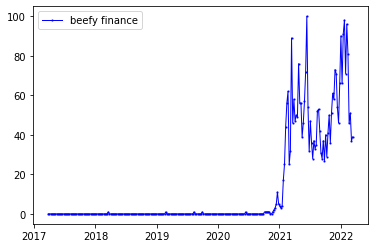

In [ ]:
#@title beefy-finance { display-mode: "code" }
import requests
import datetime
import time
import json
from google.colab import data_table
from pycoingecko import CoinGeckoAPI
import plotly.graph_objects as go
import pandas as pd
import matplotlib.pyplot as plt
from pytrends.request import TrendReq
from __future__ import division

cg = CoinGeckoAPI()
id='beefy-finance'


a = cg.get_coin_ohlc_by_id(id=id, vs_currency='usd', days = 'max')

df = pd.DataFrame(data=a, columns = ['Date','Open','High', 'Low', 'Close'])

fig2 = go.Figure(data=[go.Candlestick(x=df['Date'],open=df['Open'], high=df['High'],low=df['Low'], close=df['Close'])])
                      
fig2.show()

# Only need to run this once, the rest of requests will use the same session.
pytrend = TrendReq()

# Create payload and capture API tokens. Only needed for interest_over_time(), interest_by_region() & related_queries()
keyword = str(id)
keyword = keyword.replace('-',' ')
pytrend.build_payload(kw_list=[keyword])

# Interest Over Time
interest_over_time_df = pytrend.interest_over_time()
df=interest_over_time_df

#print(interest_over_time_df.tail(10))
# multiple line plot
# multiple line plot
plt.plot( keyword, 'y1', data=df, marker='x', color='blue',linestyle='-', linewidth=1,ms=1.5 )

plt.legend()

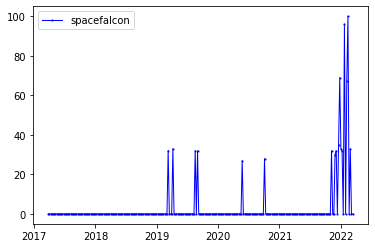

In [ ]:

#@title spacefalcon { display-mode: "code" }
import requests
import datetime
import time
import json
from google.colab import data_table
from pycoingecko import CoinGeckoAPI
import plotly.graph_objects as go
import pandas as pd
import matplotlib.pyplot as plt
from pytrends.request import TrendReq
from __future__ import division

cg = CoinGeckoAPI()
id='spacefalcon'

a = cg.get_coin_ohlc_by_id(id=id, vs_currency='usd', days = 'max')

df = pd.DataFrame(data=a, columns = ['Date','Open','High', 'Low', 'Close'])

fig2 = go.Figure(data=[go.Candlestick(x=df['Date'],open=df['Open'], high=df['High'],low=df['Low'], close=df['Close'])])
                      
fig2.show()

# Only need to run this once, the rest of requests will use the same session.
pytrend = TrendReq()

# Create payload and capture API tokens. Only needed for interest_over_time(), interest_by_region() & related_queries()
keyword = str(id)
keyword = keyword.replace('-',' ')
pytrend.build_payload(kw_list=[keyword])

# Interest Over Time
interest_over_time_df = pytrend.interest_over_time()
df=interest_over_time_df

#print(interest_over_time_df.tail(10))
# multiple line plot
# multiple line plot
plt.plot( keyword, 'y1', data=df, marker='x', color='blue',linestyle='-', linewidth=1,ms=1.5 )

plt.legend()#@title ok { display-mode: "code" }

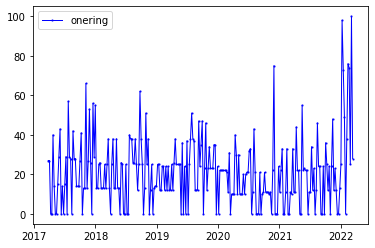

In [ ]:

#@title icecream-finance { display-mode: "code" }
import requests
import datetime
import time
import json
from google.colab import data_table
from pycoingecko import CoinGeckoAPI
import plotly.graph_objects as go
import pandas as pd
import matplotlib.pyplot as plt
from pytrends.request import TrendReq
from __future__ import division

cg = CoinGeckoAPI()
id='onering'

a = cg.get_coin_ohlc_by_id(id=id, vs_currency='usd', days = 'max')

df = pd.DataFrame(data=a, columns = ['Date','Open','High', 'Low', 'Close'])

fig2 = go.Figure(data=[go.Candlestick(x=df['Date'],open=df['Open'], high=df['High'],low=df['Low'], close=df['Close'])])
                      
fig2.show()

# Only need to run this once, the rest of requests will use the same session.
pytrend = TrendReq()

# Create payload and capture API tokens. Only needed for interest_over_time(), interest_by_region() & related_queries()
keyword = str(id)
keyword = keyword.replace('-',' ')
pytrend.build_payload(kw_list=[keyword])

# Interest Over Time
interest_over_time_df = pytrend.interest_over_time()
df=interest_over_time_df

#print(interest_over_time_df.tail(10))
# multiple line plot
# multiple line plot
plt.plot( keyword, 'y1', data=df, marker='x', color='blue',linestyle='-', linewidth=1,ms=1.5 )

plt.legend()#@title ok { display-mode: "code" }

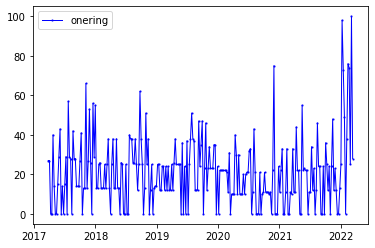

In [ ]:

#@title onering { display-mode: "code" }
import requests
import datetime
import time
import json
from google.colab import data_table
from pycoingecko import CoinGeckoAPI
import plotly.graph_objects as go
import pandas as pd
import matplotlib.pyplot as plt
from pytrends.request import TrendReq
from __future__ import division

cg = CoinGeckoAPI()
id='onering'

a = cg.get_coin_ohlc_by_id(id=id, vs_currency='usd', days = 'max')

df = pd.DataFrame(data=a, columns = ['Date','Open','High', 'Low', 'Close'])

fig2 = go.Figure(data=[go.Candlestick(x=df['Date'],open=df['Open'], high=df['High'],low=df['Low'], close=df['Close'])])
                      
fig2.show()

# Only need to run this once, the rest of requests will use the same session.
pytrend = TrendReq()

# Create payload and capture API tokens. Only needed for interest_over_time(), interest_by_region() & related_queries()
keyword = str(id)
keyword = keyword.replace('-',' ')
pytrend.build_payload(kw_list=[keyword])

# Interest Over Time
interest_over_time_df = pytrend.interest_over_time()
df=interest_over_time_df

#print(interest_over_time_df.tail(10))
# multiple line plot
# multiple line plot
plt.plot( keyword, 'y1', data=df, marker='x', color='blue',linestyle='-', linewidth=1,ms=1.5 )

plt.legend()#@title ok { display-mode: "code" }n

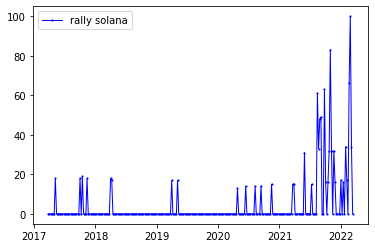

In [ ]:

#@title rally-solana { display-mode: "code" }
import requests
import datetime
import time
import json
from google.colab import data_table
from pycoingecko import CoinGeckoAPI
import plotly.graph_objects as go
import pandas as pd
import matplotlib.pyplot as plt
from pytrends.request import TrendReq
from __future__ import division

cg = CoinGeckoAPI()
id='rally-solana'

a = cg.get_coin_ohlc_by_id(id=id, vs_currency='usd', days = 'max')

df = pd.DataFrame(data=a, columns = ['Date','Open','High', 'Low', 'Close'])

fig2 = go.Figure(data=[go.Candlestick(x=df['Date'],open=df['Open'], high=df['High'],low=df['Low'], close=df['Close'])])
                      
fig2.show()

# Only need to run this once, the rest of requests will use the same session.
pytrend = TrendReq()

# Create payload and capture API tokens. Only needed for interest_over_time(), interest_by_region() & related_queries()
keyword = str(id)
keyword = keyword.replace('-',' ')
pytrend.build_payload(kw_list=[keyword])

# Interest Over Time
interest_over_time_df = pytrend.interest_over_time()
df=interest_over_time_df

#print(interest_over_time_df.tail(10))
# multiple line plot
# multiple line plot
plt.plot( keyword, 'y1', data=df, marker='x', color='blue',linestyle='-', linewidth=1,ms=1.5 )

plt.legend()#@title ok { display-mode: "code" }n

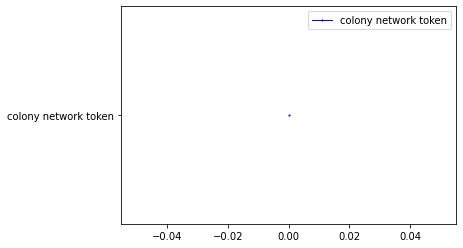

In [ ]:

#@title ok { display-mode: "code" }
import requests
import datetime
import time
import json
from google.colab import data_table
from pycoingecko import CoinGeckoAPI
import plotly.graph_objects as go
import pandas as pd
import matplotlib.pyplot as plt
from pytrends.request import TrendReq
from __future__ import division

cg = CoinGeckoAPI()
id='colony-network-token'

a = cg.get_coin_ohlc_by_id(id=id, vs_currency='usd', days = 'max')

df = pd.DataFrame(data=a, columns = ['Date','Open','High', 'Low', 'Close'])

fig2 = go.Figure(data=[go.Candlestick(x=df['Date'],open=df['Open'], high=df['High'],low=df['Low'], close=df['Close'])])
                      
fig2.show()

# Only need to run this once, the rest of requests will use the same session.
pytrend = TrendReq()

# Create payload and capture API tokens. Only needed for interest_over_time(), interest_by_region() & related_queries()
keyword = str(id)
keyword = keyword.replace('-',' ')
pytrend.build_payload(kw_list=[keyword])

# Interest Over Time
interest_over_time_df = pytrend.interest_over_time()
df=interest_over_time_df

#print(interest_over_time_df.tail(10))
# multiple line plot
# multiple line plot
plt.plot( keyword, 'y1', data=df, marker='x', color='blue',linestyle='-', linewidth=1,ms=1.5 )

plt.legend()#@title ok { display-mode: "code" }

##Twitter API attempt

In [ ]:
import tweepy

consumer_key = 'la1f33S7qijuWBaacNw44nASC'
consumer_secret = 'DSIJ2qyr5Jf1CWSENvADJAn0Z1cdx5rpPfBjQZQmAFPBz3lbXZ'
access_token = '1371833287392559119-4X8YWHUQqu5M6239Ua6fMrs0wXsDUk'
access_token_secret = 'orNECtf82K18cGxQzWxGhCMJYfclmP1RbqxNZVn0Cm3Dy'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth)

public_tweets = api.home_timeline()
for tweet in public_tweets:
    print(tweet.text)

💡Looking for another digestible overview of #crypto ownership worldwide 🌎? 

TripleA provides a comprehensive break… https://t.co/mlLCj1LYNE
*PSAKI SAYS UKRAINE BIG FERTILIZER EXPORTER, CONT. TO MONITOR
RT @AlanzM2k: We're giving NFT Worlds 12.5 ETH ($33,268.88) 👈

To enter:
1. Like/ Retweet
2. Follow us 
3. Tag 3 frens 

Will randomly sele…
Supply vs Demand-side DAOs 🤯🤯🤯 https://t.co/Wt2cWxlmJk
*NTSB PICKS INVESTIGATOR TO PROBE OF BOEING 737-800 NEAR WUZHOU
Oil prices have exploded higher, meanwhile hedge funds have sold a record 1BN barrels in the past month. When this… https://t.co/ZjZuAvCS4U
@zerohedge We gonna freeze their fx reserves too?
When asked about who’s responsible for the Cybertruck, here’s what’s @elonmusk said: https://t.co/EL0Pd4zbCZ
🧊  🦉  🧊  🦉  🧊  🦉  🧊  🦉  🧊  🦉   🧊  🦉  🧊  🦉  🧊  🦉  🧊  🦉  🧊  🦉  🧊  🦉  🧊  🦉  🧊  🦉  🧊  🦉  🧊  🦉   🧊  🦉  🧊  🦉  🧊  🦉  🧊  🦉… https://t.co/oKdeNQ77KL
Hedge Funds Sell Record 1 Billion Barrels In Oil Futures Just As Prices Explode Higher https://t.c